### Preparing the dataset

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_text, export_graphviz
import graphviz
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
df = data[data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.fillna(0, inplace=True)


C:\Users\omer_\AppData\Local\Temp\ipykernel_13360\3209962801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [8]:
df['median_house_value'] = np.log1p(df['median_house_value'])

C:\Users\omer_\AppData\Local\Temp\ipykernel_13360\2367328898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_house_value'] = np.log1p(df['median_house_value'])


In [9]:


df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [10]:
y_train = df_train['median_house_value'].values
del df_train['median_house_value']

y_val = df_val['median_house_value'].values
del df_val['median_house_value']

y_test = df_test['median_house_value'].values
del df_test['median_house_value']


In [11]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


### Question 1

In [16]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_val)

mse_val = ((y_val - y_pred)**2).mean()
rmse_val = np.sqrt(mse_val)

print('Number of nodes = {0}'.format(dtr.tree_.node_count))
print('Parameters used: {}'.format(dtr.get_params()))
print('Decision Tree Regressor feature = {0}'.format(dtr.tree_.feature))
print('Decision Tree Regressor threshold = {0}'.format(dtr.tree_.threshold))
print('Validation RMSE = {0}'.format(rmse_val))
print('Feature importances: {0}'.format(dtr.feature_importances_))

print(export_text(dtr, feature_names=dv.get_feature_names()))

Number of nodes = 3
Parameters used: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision Tree Regressor feature = [ 5 -2 -2]
Decision Tree Regressor threshold = [ 0.5 -2.  -2. ]
Validation RMSE = 0.4534647713207326
Feature importances: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



d:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


d:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


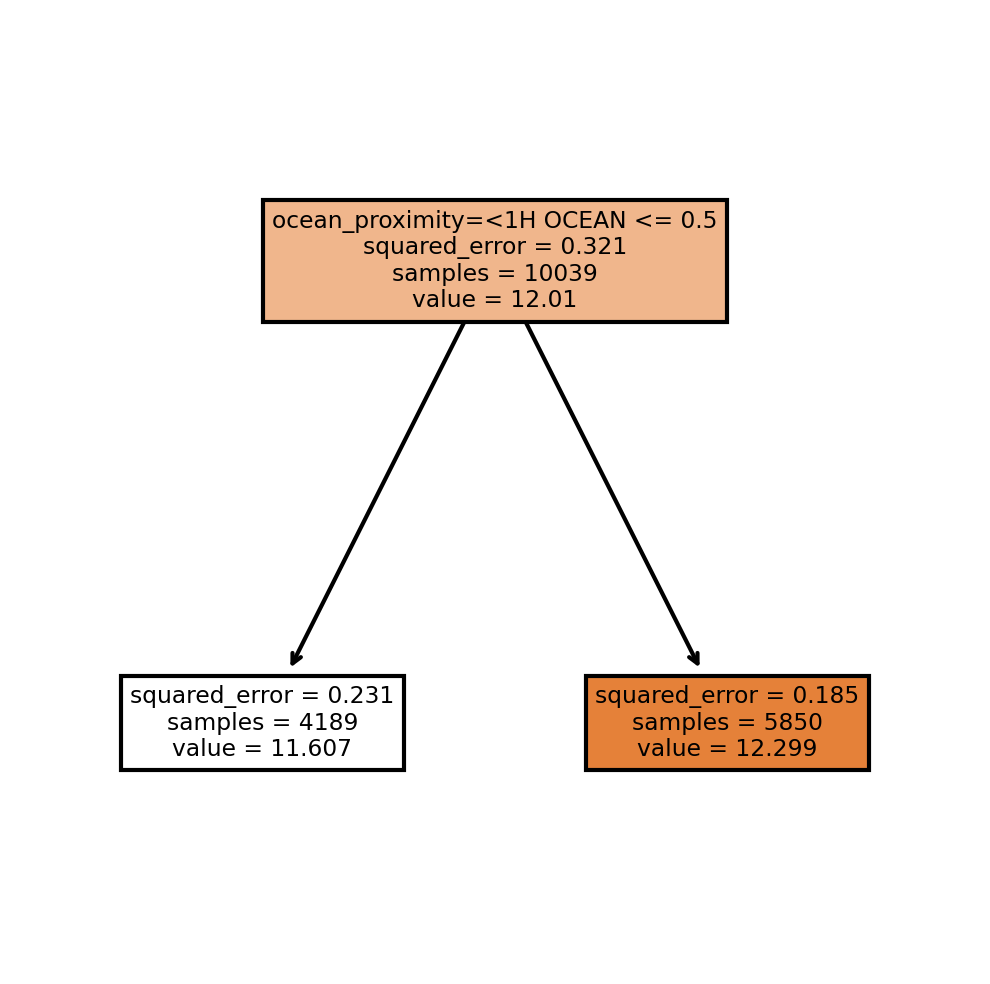

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)


plot_tree(dtr, feature_names=dv.get_feature_names(), filled=True)
plt.show()

### Question 2

In [23]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

print('RMSE = {0}'.format(np.sqrt(((y_val - y_pred)**2).mean())))

RMSE = 0.23817740383441022
